In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Processing and Feature Engineering (Day 1)
# 1. Data Cleaning

# Load the dataset using Pandas.

In [2]:
train = pd.read_csv(r'C:\Users\Basavaraj Humanabad\Documents\train.csv')
test = pd.read_csv(r'C:\Users\Basavaraj Humanabad\Documents\test.csv')
stores = pd.read_csv(r'C:\Users\Basavaraj Humanabad\Documents\stores.csv')
oil = pd.read_csv(r'C:\Users\Basavaraj Humanabad\Documents\oil.csv')
holidays = pd.read_csv(r'C:\Users\Basavaraj Humanabad\Documents\holidays_events.csv')

# Convert date columns to datetime format

In [3]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

# Convert date columns to datetime format

In [4]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

# Fill missing values in oil prices using interpolation

In [5]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()
oil['dcoilwtico'] 

0         NaN
1       93.14
2       92.97
3       93.12
4       93.20
        ...  
1213    47.65
1214    46.40
1215    46.46
1216    45.96
1217    47.26
Name: dcoilwtico, Length: 1218, dtype: float64

# Merge data

In [6]:
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays, on='date', how='left')

test = test.merge(stores, on='store_nbr', how='left')
test = test.merge(oil, on='date', how='left')
test = test.merge(holidays, on='date', how='left')

# 2.Feature Engineering

In [7]:
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek
train['is_weekend'] = train['day_of_week'].isin([5,6]).astype(int)
train['is_december'] = (train['month'] == 12).astype(int)

# Identify seasonal trends (e.g., are sales higher in December?).

In [8]:
train["is_december"] = (train["month"] == 12).astype(int)
train["is_december"]

0          0
1          0
2          0
3          0
4          0
          ..
3054343    0
3054344    0
3054345    0
3054346    0
3054347    0
Name: is_december, Length: 3054348, dtype: int32

# Event-based Features:Create binary flags for holidays, promotions, and economic events.

In [9]:
train["is_holiday"] = train["type_x"].notna().astype(int)
train["is_holiday"]

0          1
1          1
2          1
3          1
4          1
          ..
3054343    1
3054344    1
3054345    1
3054346    1
3054347    1
Name: is_holiday, Length: 3054348, dtype: int32

# Identify if a day is a government payday (15th and last day of the month).

In [10]:
train["is_govt_payday"] = train["day"].isin([15] + train["date"].dt.days_in_month.tolist()).astype(int)
train["is_govt_payday"]

0          0
1          0
2          0
3          0
4          0
          ..
3054343    1
3054344    1
3054345    1
3054346    1
3054347    1
Name: is_govt_payday, Length: 3054348, dtype: int32

# Consider earthquake impact (April 16, 2016) as a separate feature.

In [11]:
train["earthquake_impact"] = (train["date"] == "2016-04-16").astype(int)
train["earthquake_impact"]

0          0
1          0
2          0
3          0
4          0
          ..
3054343    0
3054344    0
3054345    0
3054346    0
3054347    0
Name: earthquake_impact, Length: 3054348, dtype: int32

# Rolling Statistics

In [12]:
train['sales_lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['sales_lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
train['rolling_mean_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7).mean())
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7).std())

# Store-Specific Aggregations

In [13]:
store_sales_avg = train.groupby('store_nbr')['sales'].mean().rename('store_avg_sales')
train = train.merge(store_sales_avg, on='store_nbr', how='left')
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,is_weekend,is_december,is_holiday,is_govt_payday,earthquake_impact,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_std_7,store_avg_sales
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,0,0,1,1,0,358.132,571.333,381.083426,86.433346,476.819765
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,0,0,1,1,0,112.954,125.960,121.605856,16.673439,476.819765
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,0,0,1,1,0,2299.715,2041.967,1525.855714,439.927872,476.819765
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,0,0,1,1,0,170.000,0.000,144.571429,38.504793,476.819765


# 3.Exploratory Data Analysis (EDA)

C:\Users\Basavaraj Humanabad\AppData\Local\Temp\ipykernel_5084\3674767184.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='date', y='sales', ci=None)


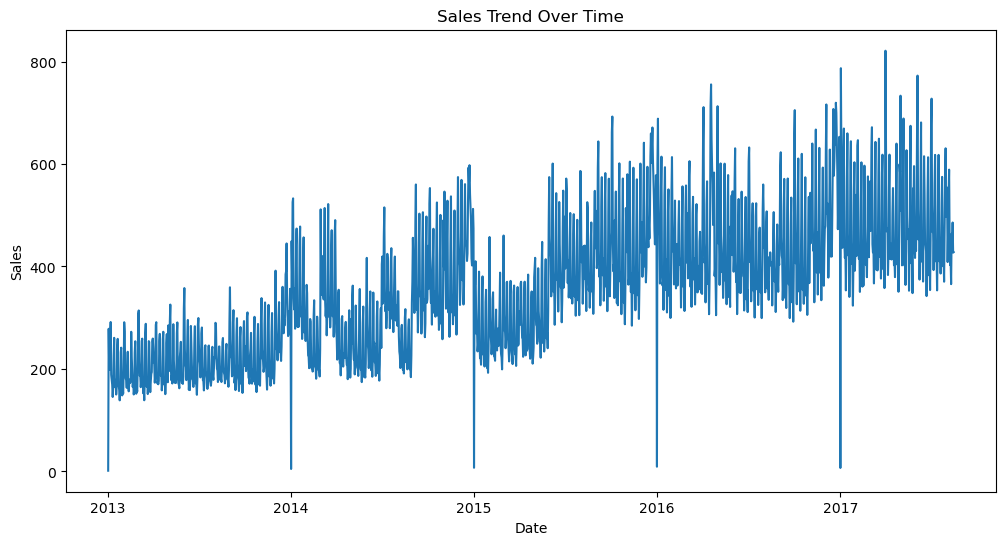

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=train, x='date', y='sales', ci=None)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Checking correlation between oil prices and sales

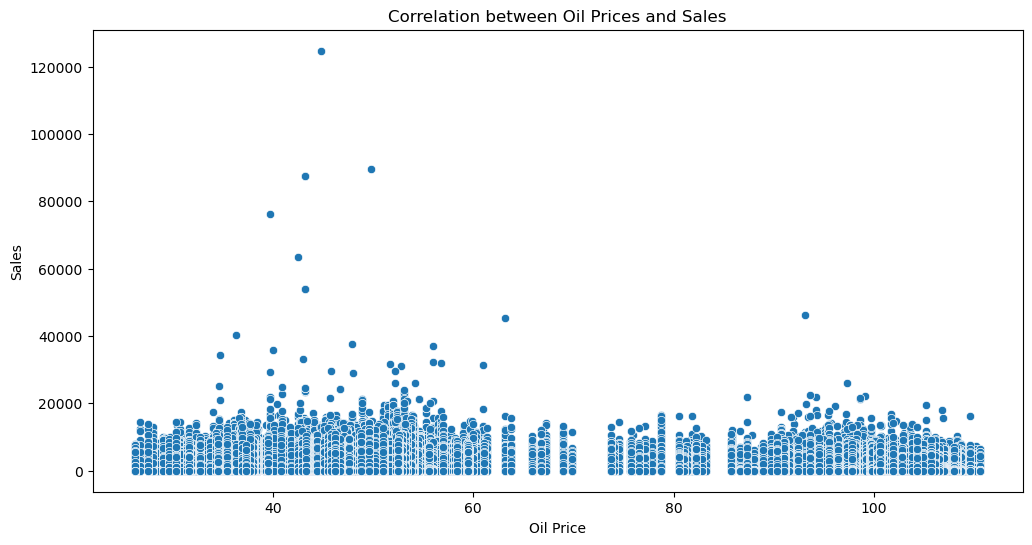

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x='dcoilwtico', y='sales')
plt.title('Correlation between Oil Prices and Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

# Checking anomalies

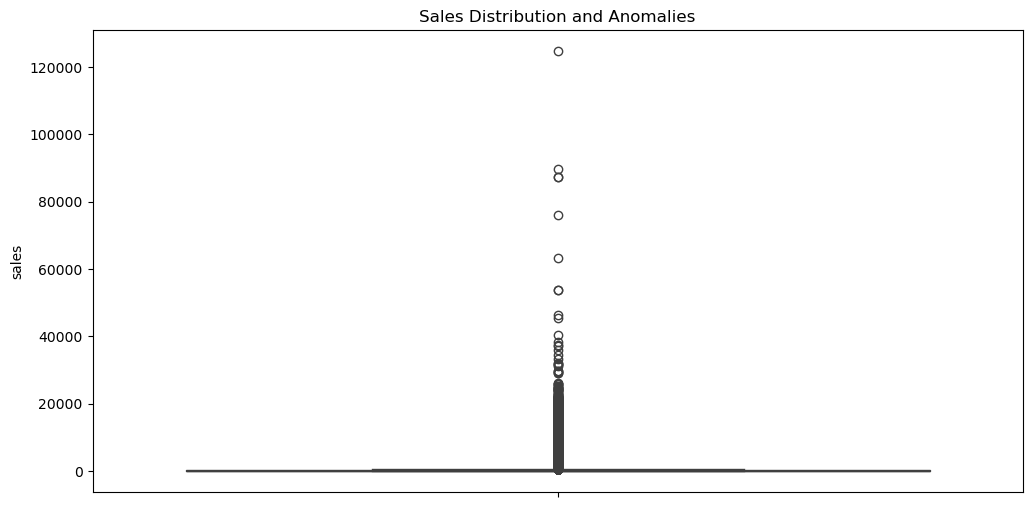

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train, y='sales')
plt.title('Sales Distribution and Anomalies')
plt.show()

# Documenting preprocessing steps

In [17]:
with open('preprocessing_documentation.txt', 'w') as f:
    f.write("Data Processing and Feature Engineering Steps:\n")
    f.write("1. Handled missing values in oil prices using interpolation.\n")
    f.write("2. Converted date columns to proper datetime format.\n")
    f.write("3. Merged stores, oil, and holidays data with sales data.\n")
    f.write("4. Extracted time-based features: day, week, month, year, day_of_week.\n")
    f.write("5. Created binary indicators for holidays, paydays, and economic events.\n")
    f.write("6. Computed rolling sales statistics and lagged features.\n")
    f.write("7. Performed store-specific aggregations for average sales.\n")
    f.write("8. Conducted EDA with time series visualization and anomaly detection.\n")

# Part 2: Model Selection, Forecasting, and Evaluation (Day 2)
# 1. Model Training

In [18]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,is_weekend,is_december,is_holiday,is_govt_payday,earthquake_impact,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_std_7,store_avg_sales
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,0,0,1,0,0,NaN,NaN,NaN,NaN,254.651925


In [19]:
from sklearn.model_selection import train_test_split  # Import train_test_split

# Define feature set and target variable
X = train[['day', 'week', 'month', 'year', 'day_of_week', 'is_weekend', 'is_december', 
           'is_holiday', 'is_govt_payday', 'earthquake_impact', 'sales_lag_7', 
           'sales_lag_30', 'rolling_mean_7', 'rolling_std_7', 'store_avg_sales']]
y = train['sales']

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Import necessary library
from sklearn.metrics import mean_absolute_error

# Ensure that y_pred_baseline is properly defined
y_pred_baseline = X_val['sales_lag_7'].fillna(y_train.mean())  # Fill NaNs with training mean

# Compute Mean Absolute Error (MAE)
mae_baseline = mean_absolute_error(y_val, y_pred_baseline)

print("Baseline Model MAE:", mae_baseline)

Baseline Model MAE: 81.09573847264704
